In [7]:
# best 3 solutions based on EXP1 & 3 in turns of f1 weighted is:
# XGBcls, RoadNet+Segment TOTAL, 0.5284741533025521; + smote_svm: 0.5396583161
# XGBreg, RoadNet+Segment NO_TOTAL, 0.512063968; type instead of total + smote_svm: 0.533828674; + smote_svm+mrmr: 0.5330293468
# GDBcls, RoadNet+Segment TOTAL, 0.5107103184755486; +smote_svm + rfecv_linsvm: 0.5178884611

In [8]:
from src.experiment_based_function import SEEDS
import pandas as pd
%matplotlib inline

In [ ]:
import os
import glob

In [23]:
def get_exp4_result(eval_or_grid):
    res = []
    for directoy in glob.glob('data/exp4/*'):
        qa = os.path.basename(directoy)
        q, a = qa.split('#')
        for seed in SEEDS:
            df = pd.read_csv('%s/seed_%d/%s_res.csv' % (directoy, seed, eval_or_grid), index_col=0)
            df['q'] = q
            df['a'] = a
            df['seed'] = seed
            res.append(df)
    return pd.concat(res)

In [24]:
eval_res = get_exp4_result('eval')

In [26]:
eval_res.columns

Index(['#ftr_all', '#ftr_keep', '#test_sample', '#train_sample',
       'feature_selection', 'ftr_combo_name', 'model_name', 'test_acc',
       'test_f1_macro', 'test_f1_micro', 'test_f1_weighted', 'test_mse',
       'test_n_classes', 'train_acc', 'train_f1_macro', 'train_f1_micro',
       'train_f1_weighted', 'train_mse', 'train_n_classes', 'upsample',
       'y_dist', 'y_dist_up', 'q', 'a', 'seed'],
      dtype='object')

In [55]:
print('train', eval_res.train_n_classes.value_counts().to_dict())
print('test', eval_res.test_n_classes.value_counts().to_dict())

print('train', 'test')
print(eval_res.apply(lambda x: (x.train_n_classes, x.test_n_classes), axis=1).value_counts())

train {5: 2412, 4: 210, 3: 15}
test {4: 1227, 5: 945, 3: 420, 2: 45}
train test
(5, 4)    1182
(5, 5)     915
(5, 3)     285
(4, 3)     120
(4, 4)      45
(5, 2)      30
(4, 5)      30
(3, 3)      15
(4, 2)      15
dtype: int64


In [47]:
f1_choices = ['test_f1_weighted', 'test_f1_macro', 'test_f1_micro']

In [73]:
keys = ['q', 'a', 'upsample', 'ftr_combo_name', 'model_name', 'feature_selection']


In [76]:
info = eval_res.groupby(['q','a','upsample']).mean()[['#test_sample', '#train_sample','test_n_classes','train_n_classes', ]]

In [85]:
means = eval_res.groupby(keys).mean()[f1_choices]
stds = eval_res.groupby(keys).std()[f1_choices]
means = means.reset_index().merge(info.reset_index(), how='left').set_index(keys)

f1_type = test_f1_weighted


test_f1_weighted  \
q                a                             upsample ftr_combo_name                 model_name feature_selection                     
household_income $25,000 to $39,999            None     RoadNet                        GDBcls     None                       0.827582   
                                                        RoadNet+Segment_TOTAL_~2014    GDBcls     None                       0.771548   
                                                        RoadNet+Segment_NO_TOTAL_~2014 XGBcls     None                       0.675107   
                 $85,000 to $99,999            None     RoadNet                        GDBcls     None                       0.666854   
                 $25,000 to $39,999            None     RoadNet+Segment_NO_TOTAL_~2014 GDBcls     None                       0.653024   
                                                        RoadNet                        XGBcls     None                       0.644976   
                                                        RoadNet+Segment_TOTAL_~2014    XGBcls     None                       0.626010   
                                                        Segment_NO_TOTAL_~2014         XGBcls     None                       0.624870   
                 $55,000 to $69,999            None     RoadNet                        XGBcls     None                       0.623204   
                 $85,000 to $99,999            None     RoadNet+Segment_TOTAL_~2014    XGBcls     None                       0.617125   
                 $55,000 to $69,999            None     RoadNet+Segment_TOTAL_~2014    GDBcls     None                       0.606815   
                 $150,000 or more              None     RoadNet+Segment_TOTAL_~2014    GDBcls     None                       0.604607   
                                                        RoadNet+Segment_NO_TOTAL_~2014 GDBcls     None                       0.598325   
                 $55,000 to $69,999            None     RoadNet                        GDBcls     None                       0.584345   
bk_purpose       Mainly utility biking         None     RoadNet+Segment_TOTAL_~2014    GDBcls     None                       0.583543   
bk_type          Road Bike                     None     RoadNet+Segment_TOTAL_~2014    GDBcls     None                       0.580521   
household_income $85,000 to $99,999            None     RoadNet                        XGBcls     None                       0.579994   
                 $150,000 or more              None     RoadNet+Segment_NO_TOTAL_~2014 XGBreg     None                       0.579384   
age              35-44                         None     RoadNet                        GDBcls     None                       0.577789   
household_income $150,000 or more              None     RoadNet+Segment_NO_TOTAL_~2014 XGBcls     None                       0.575644   
                                                        RoadNet+Segment_TOTAL_~2014    XGBcls     None                       0.574125   
bk_type          Road Bike                     None     RoadNet                        GDBcls     None                       0.573302   
bk_purpose       Mainly utility biking         None     RoadNet+Segment_NO_TOTAL_~2014 GDBcls     None                       0.571430   
bk_type          Road Bike                     None     RoadNet+Segment_TOTAL_~2014    XGBreg     None                       0.568628   
                                                        RoadNet+Segment_NO_TOTAL_~2014 GDBcls     None                       0.567594   
household_income $150,000 or more              None     RoadNet                        GDBcls     None                       0.566549   
                                                                                       XGBreg     None                       0.564205   
bk_purpose       Mainly recreational biking    None     RoadNet                        GDBcls     None                       0.563435   
househo

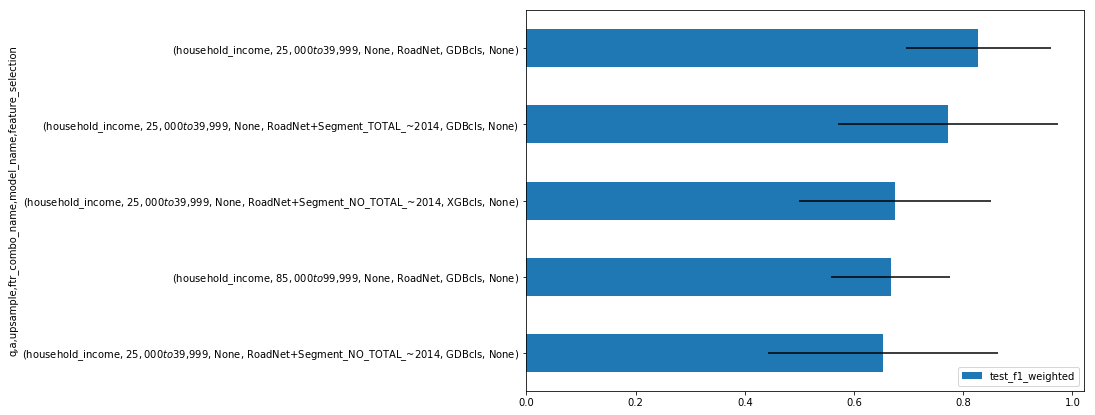

In [87]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

means_to_plot = means[[f1_type]].sort_values(f1_type, ascending=True)
stds_to_plot = stds[[f1_type]]

df_top_n = 100
plot_top_n = 5
means_to_plot.iloc[-plot_top_n:].plot(kind='barh', figsize=(10,7), xerr=stds_to_plot)
means.loc[means_to_plot.iloc[:-(df_top_n+1):-1,:].index].drop([x for x in f1_choices if x != f1_type], axis=1)

In [94]:
def get_paper_table(means, f1_type, key_cols):
    cols_name_convert = {'RoadNet': 'RoadNet', 'RoadNet+Segment_NO_TOTAL_~2014': 'RoadNet+Segment type',
     'RoadNet+Segment_TOTAL_~2014': 'RoadNet+Segment total', 'Segment_NO_TOTAL_~2014': 'Segment type',
     'Segment_TOTAL_~2014': 'Segment total'}
    means_for_pivot = means.reset_index()
    means_for_pivot['key'] = means_for_pivot.apply(lambda x: tuple([x[col] for col in key_cols]), axis=1)
    table = means_for_pivot.reset_index().pivot(index='key', columns='ftr_combo_name', values=f1_type)
    table.index = pd.MultiIndex.from_tuples(table.index, names=key_cols)    
    table.columns.name = f1_type
    table.columns = [cols_name_convert[col] for col in table.columns]
    return table[['RoadNet', 'Segment total', 'Segment type', 'RoadNet+Segment total', 'RoadNet+Segment type']]

In [97]:
key_cols = [k for k in keys if k!='ftr_combo_name']+['#test_sample', '#train_sample','test_n_classes','train_n_classes']
table = get_paper_table(means, f1_type, key_cols)

In [98]:
table.to_csv('deliverables/exp4.csv', encoding='utf8')